# Lecture de la base de donnée

La base de donnée sera lue à partir d'un fichier csv correspondant en terme de structure à [example.csv](example.csv). <br>
Ce fichier contient trois colonnes : fichier csv contenant le chromatograme, etat normal(1) ou non(0), label : description.

Comme dans [readData.ipynb](readData.ipynb), on importe les modules utiles.

In [50]:
import pandas as pd
import tools
from importlib import reload
reload(tools)

pd.options.plotting.backend = "plotly"

On spécifie le chemin du fichier dans lequel est stocké la base de donnée dans la variable `FILE`, et le chemin jusqu'aux chromatogrammes mentionnés dans la base de donnée dans la variable : `PATH`. <br>

In [51]:
FILE = "../data/database.csv"
PATH = "../data/chromatograms/"

On met les informations de la base de donnée dans un DataFrame (`db`), dans lequel on remplacera les 1 et 0 dans la colonne `normal` par respectivement `True` et `False` si besoin dans la suite du traitement.

In [52]:
db = pd.read_csv(FILE)
print(db)

                  file  status  \
0      abdiaa-20201012       1   
1    abrahamv-20200602       0   
2       akina-20201209       0   
3       akina-20201209       0   
4    alema-20200928001       1   
..                 ...     ...   
187  litaizec-20200128       1   
188  loichotl-20201130       0   
189   loubryd-20200124       1   
190    loyale-20200929       0   
191  gagneuxm-20201218       0   

                                                 label  
0    Pas d'évidence de trouble d'ordre métabolique ...  
1    Pas d'évidence de trouble d'ordre métabolique ...  
2    Résultats sous réserve : la faiblesse de la cr...  
3                                                    -  
4    Pas d'évidence de trouble d'ordre métabolique ...  
..                                                 ...  
187  Pas d'évidence de trouble d'ordre métabolique ...  
188                          Suivi de déficit en ETFDH  
189  Pas d'évidence de trouble d'ordre métabolique ...  
190  Ce prélèvement m

In [53]:
db['status'] = db['status'].astype('bool')
print(db)

                  file  status  \
0      abdiaa-20201012    True   
1    abrahamv-20200602   False   
2       akina-20201209   False   
3       akina-20201209   False   
4    alema-20200928001    True   
..                 ...     ...   
187  litaizec-20200128    True   
188  loichotl-20201130   False   
189   loubryd-20200124    True   
190    loyale-20200929   False   
191  gagneuxm-20201218   False   

                                                 label  
0    Pas d'évidence de trouble d'ordre métabolique ...  
1    Pas d'évidence de trouble d'ordre métabolique ...  
2    Résultats sous réserve : la faiblesse de la cr...  
3                                                    -  
4    Pas d'évidence de trouble d'ordre métabolique ...  
..                                                 ...  
187  Pas d'évidence de trouble d'ordre métabolique ...  
188                          Suivi de déficit en ETFDH  
189  Pas d'évidence de trouble d'ordre métabolique ...  
190  Ce prélèvement m

Ensuite plutôt que d'avoir uniquement le nom des chromatogrammes, on peut récupérer les courbes traitées avec la fonction `readListOfData`.

In [54]:
db['chromato'] = tools.readListOfData(db['file'], PATH)
print(db)

                  file  status  \
0      abdiaa-20201012    True   
1    abrahamv-20200602   False   
2       akina-20201209   False   
3       akina-20201209   False   
4    alema-20200928001    True   
..                 ...     ...   
187  litaizec-20200128    True   
188  loichotl-20201130   False   
189   loubryd-20200124    True   
190    loyale-20200929   False   
191  gagneuxm-20201218   False   

                                                 label  \
0    Pas d'évidence de trouble d'ordre métabolique ...   
1    Pas d'évidence de trouble d'ordre métabolique ...   
2    Résultats sous réserve : la faiblesse de la cr...   
3                                                    -   
4    Pas d'évidence de trouble d'ordre métabolique ...   
..                                                 ...   
187  Pas d'évidence de trouble d'ordre métabolique ...   
188                          Suivi de déficit en ETFDH   
189  Pas d'évidence de trouble d'ordre métabolique ...   
190  Ce pré

In [55]:
db['chromato'][0].df.plot()

Sélection des colonnes pour l'entrainement du réseau (dans le cas normal/non normal)

In [56]:
db.loc[:, ['chromato', 'status']]

,chromato,status
0,<tools.Data object at 0x000001EA30E55250>,True
1,<tools.Data object at 0x000001EA31244550>,False
2,<tools.Data object at 0x000001EA306A47C0>,False
3,<tools.Data object at 0x000001EA306A4850>,False
4,<tools.Data object at 0x000001EA306429A0>,True
...,...,...
187,<tools.Data object at 0x000001EA30EC8AC0>,True
188,<tools.Data object at 0x000001EA30ECB670>,False
189,<tools.Data object at 0x000001EA30ECB280>,True
190,<tools.Data object at 0x000001EA30ECB2E0>,False


Exemple de données sous forme de matrice pour l'utilisation en machine learning avec scikit-learn, et affichage du preier chromatogramme.

Nombre de données 192
En entrée : 
 [[ 0.         13.37451028 26.42785742 ... 29.21596513 31.41687233
  32.43741909]
 [33.68412675  0.          0.         ...  5.63425429  8.50415174
   4.47952159]
 [14.25426831  5.40031675  0.         ...  5.24134828  4.53654085
   3.66542156]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 9.48935028  0.          0.         ...  3.46639459  0.
   3.34471824]
 [ 0.          0.          0.         ...  3.22982399  3.70495206
   4.04306957]] 
En sortie :  [1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1
 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0
 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1
 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0
 1 1 1 0 1 0 0]


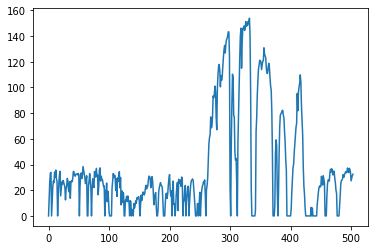

In [60]:
import matplotlib.pyplot as plt
reload(tools)
X, y = tools.getData(FILE, PATH)
print('Nombre de données', len(y))
print("En entrée : \n", X, "\nEn sortie : ", y)
plt.plot(X[0, :])
plt.show()